In [2]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures #polynomial
from sklearn.pipeline import make_pipeline #polynomial 
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#load and preprocess the data
#need to label my X_test, X_train, Y_test, Y_train
y_train = pd.read_csv("classification_ytrain.csv")
X_train = pd.read_csv("classification_Xtrain.csv")
y_test = pd.read_csv("classification_ytest.csv")
X_test = pd.read_csv("classification_Xtest.csv")

print(X_train.shape)
print(y_train.shape)


FileNotFoundError: [Errno 2] File classification_ytrain.csv does not exist: 'classification_ytrain.csv'

In [ ]:
#Train the Naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)


NameError: name 'GaussianNB' is not defined

Training accuracy: 0.9483568075117371
Testing accuracy: 0.5314685314685315


Text(113.92222222222226, 0.5, 'true value')

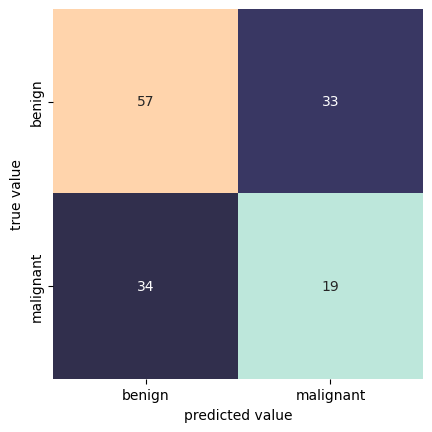

In [ ]:
#Make predictions and evaluate the model

y_train_pred1 = nb.predict(X_train)
y_test_pred1 = nb.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred1))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred1))

confusion = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Navie Bayes Model')

In [ ]:
#Train the Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\14037\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\14037\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training accuracy: 0.9507042253521126
Testing accuracy: 0.5384615384615384


Text(113.92222222222226, 0.5, 'true value')

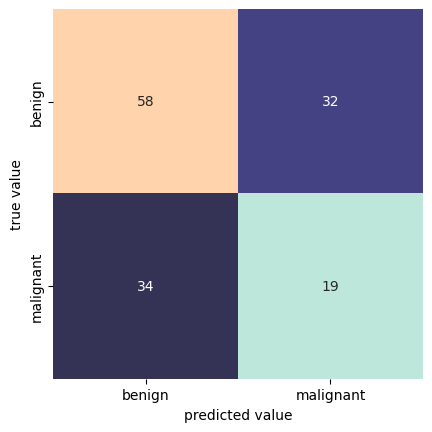

In [ ]:
#make predictions using LR from the test data

y_train_pred2 = lr.predict(X_train)
y_test_pred2 = lr.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred2))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred2))

confusion = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Logistic Regression Model')

In [ ]:
#Train the Random Forest Model
rf = RandomForestClassifier() #maybe increase the n_estimator to have a higher accuracy.
rf.fit(X_train,y_train) #test, test??

C:\Users\14037\AppData\Local\Temp\ipykernel_16380\2982763792.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

Training accuracy: 1.0
Testing accuracy: 0.5174825174825175


Text(113.92222222222226, 0.5, 'true value')

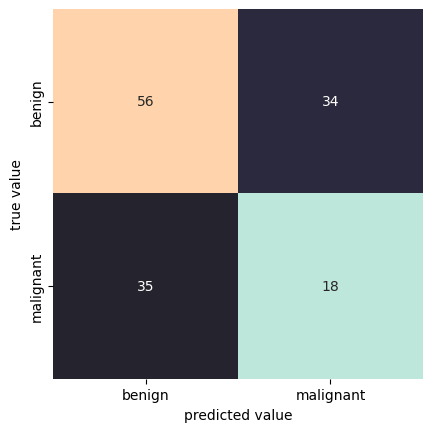

In [ ]:
#make predictions using the rf model and test data
y_train_pred3 = rf.predict(X_train)
y_test_pred3 = rf.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred3))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred3))

confusion = confusion_matrix(y_test, y_test_pred3)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Random Forest Model')

C:\Users\14037\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\14037\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.9647887323943662
Testing accuracy: 0.5384615384615384


Text(113.92222222222226, 0.5, 'true value')

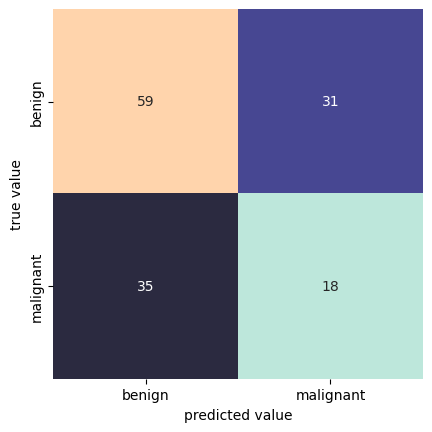

In [ ]:
# Define the logistic regression model with polynomial terms
#training accuracy is slighly higher
logreg_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(solver='lbfgs')
)

# Fit the model to the data and make predictions
logreg_poly.fit(X_train, y_train)
y_train_pred4 = logreg_poly.predict(X_train)
y_test_pred4 = logreg_poly.predict(X_test)

# Evaluate the accuracy of the model
print('Training accuracy:', accuracy_score(y_train, y_train_pred4))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred4))

confusion = confusion_matrix(y_test, y_test_pred4)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
